# ML Assignment 1
## Yash S Sankh
## Roll no 52

Title : Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn 
import seaborn as sns
!pip install haversine

In [91]:
#import data
data = pd.read_csv("uber.csv")

In [92]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [93]:
#Create a data copy
df = data.copy()

In [94]:
#Print data
df=df.head(8000)

In [95]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         8000 non-null   int64  
 1   key                8000 non-null   object 
 2   fare_amount        8000 non-null   float64
 3   pickup_datetime    8000 non-null   object 
 4   pickup_longitude   8000 non-null   float64
 5   pickup_latitude    8000 non-null   float64
 6   dropoff_longitude  8000 non-null   float64
 7   dropoff_latitude   8000 non-null   float64
 8   passenger_count    8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [96]:
#pickup_datetime is not in required data format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         8000 non-null   int64              
 1   key                8000 non-null   object             
 2   fare_amount        8000 non-null   float64            
 3   pickup_datetime    8000 non-null   datetime64[ns, UTC]
 4   pickup_longitude   8000 non-null   float64            
 5   pickup_latitude    8000 non-null   float64            
 6   dropoff_longitude  8000 non-null   float64            
 7   dropoff_latitude   8000 non-null   float64            
 8   passenger_count    8000 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 562.6+ KB


In [98]:
#Statistics of data
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,2.769486e+07,11.442829,-72.674559,39.981164,-72.635342,39.981610,1.667875
std,1.595445e+07,10.467626,12.665719,6.006576,10.007892,6.006601,1.287643
min,4.800000e+02,2.500000,-748.016667,-74.009697,-75.350437,-73.994370,0.000000
25%,1.402794e+07,6.000000,-73.992066,40.735101,-73.991471,40.733695,1.000000
50%,2.764842e+07,8.500000,-73.981504,40.752477,-73.979967,40.753132,1.000000
75%,4.127959e+07,12.500000,-73.967069,40.766865,-73.963482,40.768231,2.000000
max,5.542169e+07,350.000000,40.770667,41.366138,40.761672,41.366138,6.000000


In [99]:
#Number of missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [100]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.005721,0.013433,-0.025790,0.026929,-0.025677,0.009653
fare_amount,0.005721,1.000000,0.037397,-0.037727,0.047430,-0.042101,-0.012580
pickup_longitude,0.013433,0.037397,1.000000,-0.773625,0.758229,-0.743899,0.010977
pickup_latitude,-0.025790,-0.037727,-0.773625,1.000000,-0.934771,0.959730,-0.013181
dropoff_longitude,0.026929,0.047430,0.758229,-0.934771,1.000000,-0.978593,0.012631
dropoff_latitude,-0.025677,-0.042101,-0.743899,0.959730,-0.978593,1.000000,-0.013886
passenger_count,0.009653,-0.012580,0.010977,-0.013181,0.012631,-0.013886,1.000000


In [101]:
#Drop the rows with missing values
df.dropna(inplace=True)

Unnamed: 0              AxesSubplot(0.125,0.712609;0.227941x0.167391)
fare_amount          AxesSubplot(0.398529,0.712609;0.227941x0.167391)
pickup_longitude     AxesSubplot(0.672059,0.712609;0.227941x0.167391)
pickup_latitude         AxesSubplot(0.125,0.511739;0.227941x0.167391)
dropoff_longitude    AxesSubplot(0.398529,0.511739;0.227941x0.167391)
dropoff_latitude     AxesSubplot(0.672059,0.511739;0.227941x0.167391)
passenger_count          AxesSubplot(0.125,0.31087;0.227941x0.167391)
dtype: object

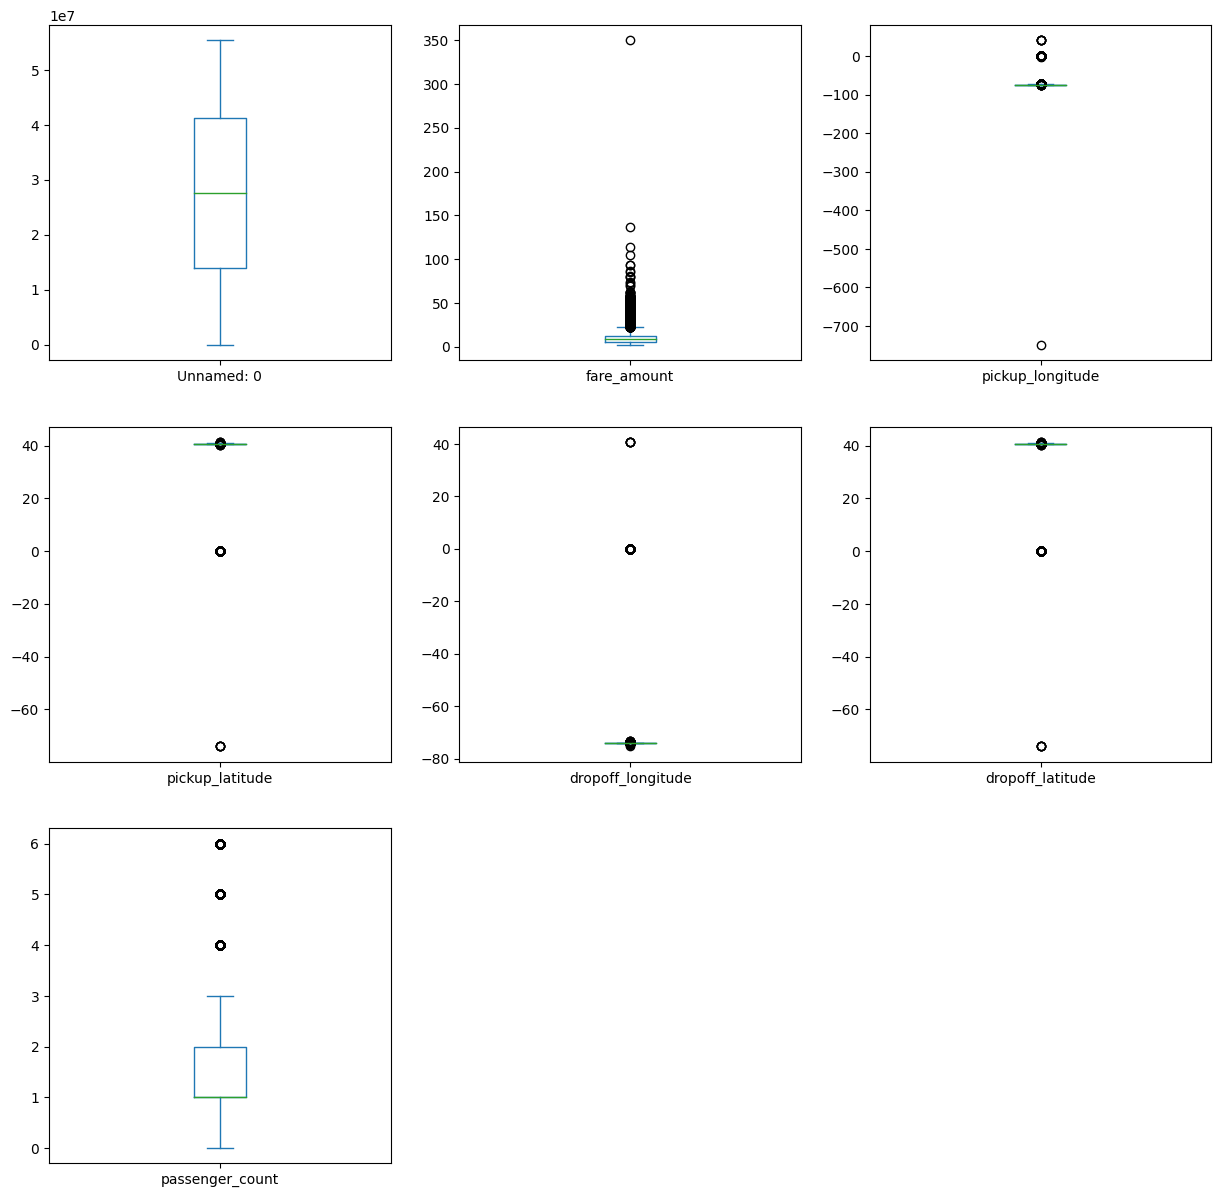

In [102]:
df.plot(kind="box", subplots=True, layout = (4,3),figsize=(15,20))

In [103]:
def remove_outlier(df1, col):
    if df1[col].dtype in [int, float]:
        Q1= df1[col].quantile(0.25) 
        Q2=df1[col].quantile(0.50)

        Q3=df1[col].quantile(0.75)

        IQR = Q3-Q1

        lower_whisker = Q1-1.5*IQR

        upper_whisker= Q3+1.5*IQR 
        print("col=",col, "Q1=",Q1,"Q2=", Q2,"Q3=",Q3) 
        df1[col] = np.clip(df1[col], lower_whisker, upper_whisker) 
    else:
        print(f"Column {col} is not numeric and cannot calculate quantiles.")
    return df1

def treat_outliers_all(df1, col_list):

    print("col_list",col_list)

    for c in col_list:

        df1 = remove_outlier(df1, c)

    return df1
df= treat_outliers_all(df, df.columns)

col_list Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')
Column Unnamed: 0 is not numeric and cannot calculate quantiles.
Column key is not numeric and cannot calculate quantiles.
col= fare_amount Q1= 6.0 Q2= 8.5 Q3= 12.5
Column pickup_datetime is not numeric and cannot calculate quantiles.
col= pickup_longitude Q1= -73.992066 Q2= -73.981504 Q3= -73.96706922595214
col= pickup_latitude Q1= 40.73510125 Q2= 40.7524765 Q3= 40.766865
col= dropoff_longitude Q1= -73.99147124999999 Q2= -73.97996679028321 Q3= -73.9634815
col= dropoff_latitude Q1= 40.733695 Q2= 40.753132 Q3= 40.768231
Column passenger_count is not numeric and cannot calculate quantiles.


Unnamed: 0              AxesSubplot(0.125,0.786098;0.227941x0.0939024)
fare_amount          AxesSubplot(0.398529,0.786098;0.227941x0.0939024)
pickup_longitude     AxesSubplot(0.672059,0.786098;0.227941x0.0939024)
pickup_latitude         AxesSubplot(0.125,0.673415;0.227941x0.0939024)
dropoff_longitude    AxesSubplot(0.398529,0.673415;0.227941x0.0939024)
dropoff_latitude     AxesSubplot(0.672059,0.673415;0.227941x0.0939024)
passenger_count         AxesSubplot(0.125,0.560732;0.227941x0.0939024)
dtype: object

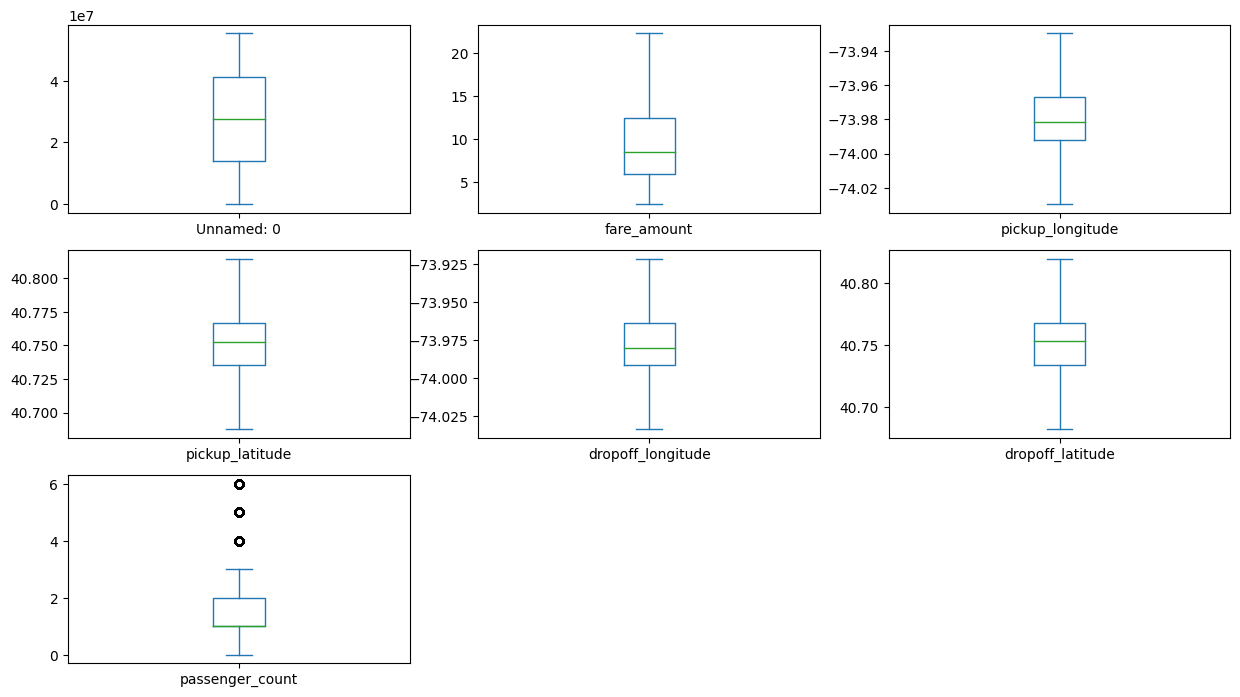

In [104]:
df.plot(kind="box" ,subplots= True , layout=(7,3), figsize=(15,20))

In [105]:
#Check the missing values now
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [106]:
#Time to apply learning models

from sklearn.model_selection import train_test_split


In [107]:
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']


In [108]:
#Necessary to apply model
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]

In [109]:
import haversine as hs

# Define a function to calculate the haversine distance
def haversine_distance(row):
    loc1 = (row['pickup_latitude'], row['pickup_longitude'])
    loc2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return hs.haversine(loc1, loc2)

# Apply the function to each row and create a new column
df['dist_travel_km'] = df.apply(haversine_distance, axis=1)

# Print the distances and display the DataFrame
print(df['dist_travel_km'])
print(df.head())

0        1.683325
1        2.457593
2        5.036384
3        1.661686
4        4.131933
          ...    
7995    11.792129
7996     1.714758
7997     0.990416
7998     5.714015
7999     0.920174
Name: dist_travel_km, Length: 8000, dtype: float64
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

            pickup_datetime  pickup_longitude  pickup_latitude  \
0 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4 2014-08-28 17:47:00+00:00        -73.929574        4

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [111]:
from sklearn.linear_model import LinearRegression

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000     0.005938          0.008992        -0.004565   
fare_amount          0.005938     1.000000          0.165482        -0.115839   
pickup_longitude     0.008992     0.165482          1.000000         0.272431   
pickup_latitude     -0.004565    -0.115839          0.272431         1.000000   
dropoff_longitude    0.023527     0.223993          0.415318         0.059101   
dropoff_latitude    -0.007352    -0.134131          0.090473         0.518721   
passenger_count      0.009653    -0.007241         -0.009506        -0.010992   
dist_travel_km      -0.004231     0.794487          0.058659        -0.079959   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
Unnamed: 0                  0.023527         -0.007352         0.009653   
fare_amount                 0.223993         -0.134131        -0.007241   
pickup_longitude            0.415318         

C:\Users\Dell\AppData\Local\Temp\ipykernel_12836\1932690646.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<AxesSubplot: >

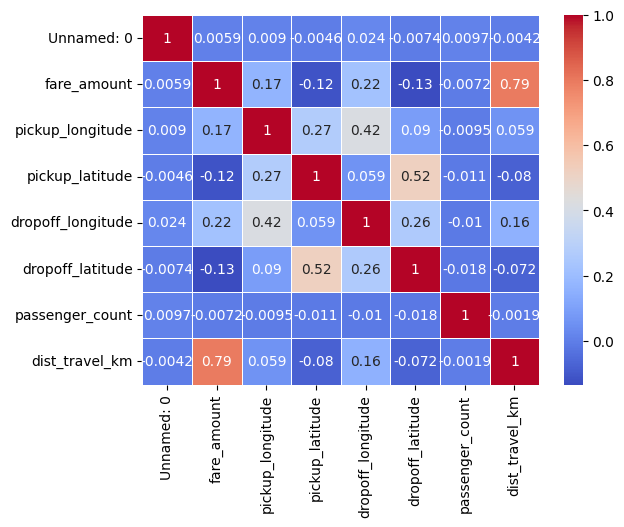

In [112]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

In [113]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [127]:
print(lrmodel.intercept_)
print(lrmodel.coef_)

10.13702658872479
[1.80835081e-10]


In [114]:
#Prediction
predict = lrmodel.predict(x_test)

      Actual_Price  Predicted_Price
0              7.0        10.143457
1             11.3        10.144738
2              4.5        10.139688
3              6.5        10.142855
4              5.5        10.143302
...            ...              ...
1595           7.0        10.140242
1596           9.5        10.146518
1597           9.7        10.140564
1598           4.5        10.146202
1599           8.9        10.143957

[1600 rows x 2 columns]


<AxesSubplot: >

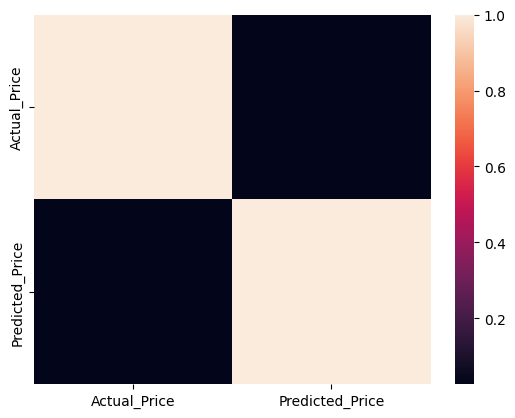

In [133]:
comparison=pd.DataFrame({"Actual_Price":y_test,"Predicted_Price":predict})
print(comparison.reset_index().drop(["index"],axis=1))
sns.heatmap(comparison.corr())

In [115]:
#Check Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
predict = lrmodel.predict(x_test)
lr_r2 = r2_score(y_test, predict)
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
mse = mean_squared_error(y_test, predict)
print(f"Mean Squared Error (MSE): {mse:.2f}")
mae = mean_absolute_error(y_test, predict)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("Linear Regression R2:", lr_r2)
print("RMSE error for the model is ", lrmodelrmse)

Mean Squared Error (MSE): 28.68
Mean Absolute Error (MAE): 4.33
Linear Regression R2: -0.00204461954986912
RMSE error for the model is  5.355275698890742


In [116]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

In [117]:
#Fit the Forest
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)

In [118]:
#Errors for the forest

rf_r2 = r2_score(y_test, rfrmodel_pred)
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("Random Forest Regression R2:", rf_r2)
print("RMSE value for Random Forest is:",rfrmodel_rmse)
mse = mean_squared_error(y_test, rfrmodel_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
mae = mean_absolute_error(y_test, rfrmodel_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Random Forest Regression R2: -0.5489964251584396
RMSE value for Random Forest is: 6.658302336824492
Mean Squared Error (MSE): 44.33
Mean Absolute Error (MAE): 5.18


In [119]:
print(rfrmodel_pred)
print(predict)

[ 9.156  10.074   9.01   ...  7.467   8.4095 13.493 ]
[10.14345698 10.14473803 10.13968762 ... 10.14056434 10.1462023
 10.14395714]
